# Random Forests: Classifier Algorithmus

Auch dieser Algorithmus arbeitet mit Entropy und Information Gain. Anders, als im klassischen Decision Tree wird hier für jeden Outcome (Leaf Node) jeweils eine Branch zum Decision Tree gemacht.

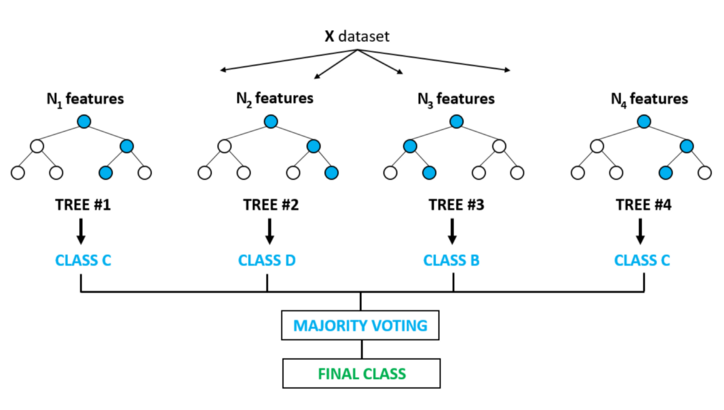

In [1]:
from IPython.display import Image
Image("./randomforest.png")

# Beispiel: Iris Classification

welche Blume ist es, anhand der Blütencharakteristika

In [2]:
from sklearn.datasets import load_iris #modul, um die daten einzuladen
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
import pandas as pd, numpy as np

In [3]:
np.random.seed(0)

In [4]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.shape #150 rows, 4 columns

(150, 4)

In [7]:
#spezies aus dem iris.target dataset als neue column anlegen
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
#eine weitere column anlegen mit random np(min 0, max 1, size len df), diese bestimmt, 
#was als test und als train data (75% = .75) angezeigt wird, siehe (true, false)
df['is_train'] = np.random.uniform(0,1, len(df)) <= .75
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


In [9]:
#dfs anlegen mit train und test rows, länge ausgeben lassen
train, test = df[df['is_train']==True], df[df['is_train']==False]
print('N of observations in training data:', len(train))
print('N of observations in testing data:', len(test))

N of observations in training data: 118
N of observations in testing data: 32


In [10]:
#Liste an features ausgeben lassen:
features = df.columns[:4]
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [11]:
#bevor wir das model trainieren, müssen wir die labels von strings in zahlen konvertieren
#species = columnname, [0] steht das format array of arrays im df, auf das wir factorizen
y = pd.factorize(train['species'])[0]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

# Model aufsetzen und trainieren

clf wird auf den RandomForestClassifier gesetzt, dann wird priorisiert und der random state zur nachvollziehbarkeit initiiert.

In [12]:
clf = RandomForestClassifier(n_jobs=2, random_state=100)
clf.fit(train[features], y)

RandomForestClassifier(n_jobs=2, random_state=100)

In [13]:
#test gibt 1,0,2 aus für die 3 arten von blumen
clf.predict(test[features])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
#andere ansicht der prediction mit probability:
#classifier sagt 1 für sertosa, 0 für die anderen beiden
clf.predict_proba(test[features]) [0:10]

array([[1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.98, 0.02, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.99, 0.01, 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ]])

In [15]:
#die predictions als namen ausgeben lassen, vom forest predicted
preds = iris.target_names[clf.predict(test[features])]
preds[0:10]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa'], dtype='<U10')

In [16]:
test['species'].head() #die ersten 5 observations sind(laut der daten):

7     setosa
8     setosa
10    setosa
13    setosa
17    setosa
Name: species, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

# Weitere Prediction w Random Forests & Evaluation

In [17]:
x=iris.data
y=iris.target

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.75)

In [19]:
classifier = RandomForestClassifier(n_estimators = 900, criterion = 'gini', random_state = 100)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [20]:
print(classifier.score(x_test, y_test))

0.9380530973451328


# Visualisierung mit Confusion Matrix & Trees

In [21]:
#confusion matrix
pd.crosstab(test['species'], preds, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,13,0,0
versicolor,0,5,2
virginica,0,0,12


In [22]:
#30 beobachtungen werten/ accuracy berechenn
accuracy = (30/32)*100
print(f'the models accuracy is {accuracy}%.')

the models accuracy is 93.75%.


Confusion Matrix 3x3 https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html 

In [4]:
import numpy as np, matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

In [6]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

In [ ]:
'''das funktioniert erst ab scikit learn version 1.0'''

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)
classifier = svm.SVC(kernel="linear", C=0.01).fit(X_train, y_train)

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# Confusion Matrix 3 x 3

In [67]:
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import classification_report

def pretty_print_conf_matrix(y_true, y_pred, 
                             classes,
                             normalize=False,
                             title='Confusion matrix',
                             cmap=plt.cm.BuPu):
    """
    Mostly stolen from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
    Normalization changed, classification_report stats added below plot
    """

    cm = confusion_matrix(y_true, y_pred)

    # Configure Confusion Matrix Plot Aesthetics (no text yet) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=11)

    # Calculate normalized values (so all cells sum to 1) if desired
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(),2) #(axis=1)[:, np.newaxis]

    # Place Numbers as Text on Confusion Matrix Plot
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=12)


    # Add Precision, Recall, F-1 Score as Captions Below Plot
    rpt = classification_report(y_true, y_pred)
    rpt = rpt.replace('avg / total', 'avg')
    rpt = rpt.replace('support', 'N Obs')

    plt.annotate(rpt, 
                 xy = (0,0), 
                 xytext = (-50, -140), 
                 xycoords='axes fraction', textcoords='offset points',
                 fontsize=10, ha='left')    

    # Plot
    plt.tight_layout()

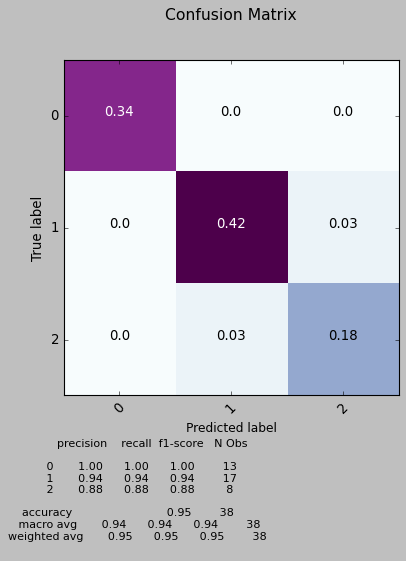

In [68]:
from sklearn import datasets
from sklearn.svm import SVC

(X,y) = datasets.load_iris(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75)

clf = SVC()
clf.fit(X_train,y_train)
y_test_pred = clf.predict(X_test)


# Plot Confusion Matrix
plt.style.use('classic')
plt.figure(figsize = (7,7))
pretty_print_conf_matrix(y_test, y_test_pred, 
                         classes = ['0', '1', '2'],
                         normalize = True, 
                         title = 'Confusion Matrix\n\n')

# Decision Trees im Random Forest
https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc

In [44]:
import matplotlib.pyplot as plt, pandas as pd
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the Breast Cancer Dataset
data = load_iris()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target

# Arrange Data into Features Matrix and Target Vector
X = df.loc[:, df.columns != 'target']
y = df.loc[:, 'target'].values

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state = 0)

# Random Forests in `scikit-learn` (with N = 100)
rf = RandomForestClassifier(n_estimators = 100,
                            random_state = 0)
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

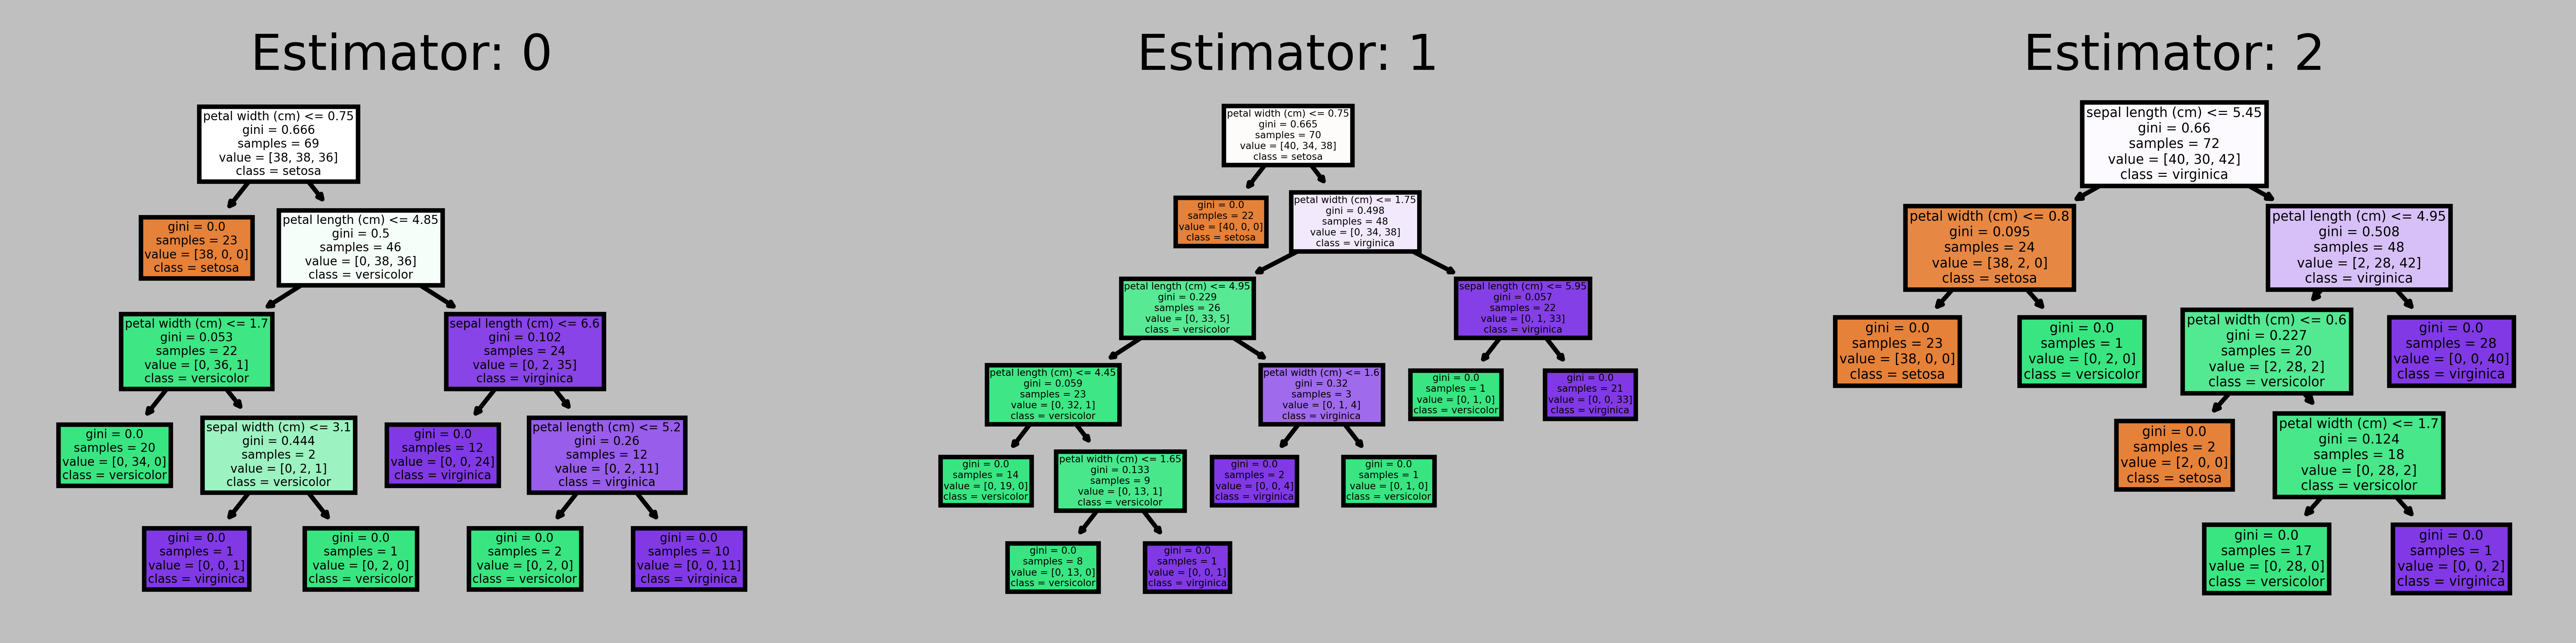

In [54]:
fn = data.feature_names
cn = data.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (10,2), dpi = 900)
for index in range(0, 3):
    tree.plot_tree(rf.estimators_[index],
                   feature_names = fn, 
                   class_names = cn,
                   filled = True,
                   ax = axes[index])

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
#fig.savefig('rf_5trees.png')